# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Exploratory Data Analysis

#### Student name: Rajbeer Kohli

#### Student number: s3798453

## 1. Import libraries

In [1]:
# Pandas is the main library used for exploratory data analysis
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library for saving a python object to file
import joblib 

# Library to assign missing values
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
import matplotlib.pyplot as plt

%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots

## 2. Load data

In [2]:
# Loading the data
attrition_df = pd.read_csv("employee-attrition.csv")

In [3]:
# Data type
print(type(attrition_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   business_travel             1470 non-null   object
 2   daily_rate                  1470 non-null   int64 
 3   department                  1470 non-null   object
 4   distance_from_home          1470 non-null   int64 
 5   education                   1470 non-null   int64 
 6   education_field             1470 non-null   object
 7   employee_count              1470 non-null   int64 
 8   employee_number             1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   int64 
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   int64 
 13  job_level                   1470 non-null   int6

In [5]:
# shape will return as tuple containing the number of rows and columns
print(attrition_df.shape)
print(attrition_df.shape[0])
print(attrition_df.shape[1])

(1470, 35)
1470
35


In [6]:
# By default, head() will display 5 rows
attrition_df.head()

age    business_travel  daily_rate              department  \
0   41      Travel_Rarely        1102                   Sales   
1   49  Travel_Frequently         279  Research & Development   
2   37      Travel_Rarely        1373  Research & Development   
3   33  Travel_Frequently        1392  Research & Development   
4   27      Travel_Rarely         591  Research & Development   

   distance_from_home  education education_field  employee_count  \
0                   1          2   Life Sciences               1   
1                   8          1   Life Sciences               1   
2                   2          2           Other               1   
3                   3          4   Life Sciences               1   
4                   2          1         Medical               1   

   employee_number  environment_satisfaction  ... standard_hours  \
0                1                         2  ...             80   
1                2                         3  ...             80   
2                4                         4  ...             80   
3                5                         4  ...             80   
4                7                         1  ...             80   

   stock_option_level  total_working_years  training_times_last_year  \
0                   0                    8                         0   
1                   1                   10                         3   
2                   0                    7                         3   
3                   0                    8                         3   
4                   1                    6                         3   

  work_life_balance  years_at_company years_in_current_role  \
0                 1                 6                     4   
1                 3                10                     7   
2                 3                 0                     0   
3                 3                 8                     7   
4                 3                 2                     2   

   years_since_last_promotion  years_with_curr_manager  attrition  
0                           0                        5          1  
1                           1                        7          0  
2                           0                        0          1  
3                           3                        0          0  
4                           2                        2          0  

[5 rows x 35 columns]

# 3. Summary statistics

In [7]:
# Print the number of rows and columns (as done before)
# The format is f""
print(f"Rows     : {attrition_df.shape[0]}")
print(f"Columns  : {attrition_df.shape[1]}" ,)
print()

# Print the column names
print(f"Features : {attrition_df.columns.tolist()}")
print()

# Print the total number of null values in the data
# Null values are - NaN (not a number), or blank spaces
print(f"Missing values :  {attrition_df.isnull().sum().values.sum()}")

# For each column, print the number of unique values
print(f"Unique values :  {attrition_df.nunique()}")

Rows     : 1470
Columns  : 35

Features : ['age', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18_yrs', 'overtime', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'attrition']

Missing values :  0
Unique values :  age                             43
business_travel                  3
daily_rate                     886
department                       3
distance_from_home              29
education                        5
education_field                  6
employee

# 4. Descriptive statistics for continuous values

In [8]:
attrition_df.describe()

age   daily_rate  distance_from_home    education  \
count  1470.000000  1470.000000         1470.000000  1470.000000   
mean     36.923810   802.485714            9.192517     2.912925   
std       9.135373   403.509100            8.106864     1.024165   
min      18.000000   102.000000            1.000000     1.000000   
25%      30.000000   465.000000            2.000000     2.000000   
50%      36.000000   802.000000            7.000000     3.000000   
75%      43.000000  1157.000000           14.000000     4.000000   
max      60.000000  1499.000000           29.000000     5.000000   

       employee_count  employee_number  environment_satisfaction  hourly_rate  \
count          1470.0      1470.000000               1470.000000  1470.000000   
mean              1.0      1024.865306                  2.721769    65.891156   
std               0.0       602.024335                  1.093082    20.329428   
min               1.0         1.000000                  1.000000    30.000000   
25%               1.0       491.250000                  2.000000    48.000000   
50%               1.0      1020.500000                  3.000000    66.000000   
75%               1.0      1555.750000                  4.000000    83.750000   
max               1.0      2068.000000                  4.000000   100.000000   

       job_involvement    job_level  ...  standard_hours  stock_option_level  \
count      1470.000000  1470.000000  ...          1470.0         1470.000000   
mean          2.729932     2.063946  ...            80.0            0.793878   
std           0.711561     1.106940  ...             0.0            0.852077   
min           1.000000     1.000000  ...            80.0            0.000000   
25%           2.000000     1.000000  ...            80.0            0.000000   
50%           3.000000     2.000000  ...            80.0            1.000000   
75%           3.000000     3.000000  ...            80.0            1.000000   
max           4.000000     5.000000  ...            80.0            3.000000   

       total_working_years  training_times_last_year  work_life_balance  \
count          1470.000000               1470.000000        1470.000000   
mean             11.279592                  2.799320           2.761224   
std               7.780782                  1.289271           0.706476   
min               0.000000                  0.000000           1.000000   
25%               6.000000                  2.000000           2.000000   
50%              10.000000                  3.000000           3.000000   
75%              15.000000                  3.000000           3.000000   
max              40.000000                  6.000000           4.000000   

       years_at_company  years_in_current_role  years_since_last_promotion  \
count       1470.000000            1470.000000                 1470.000000   
mean           7.008163               4.229252                    2.187755   
std            6.126525               3.623137                    3.222430   
min            0.000000               0.000000                    0.000000   
25%            3.000000               2.000000                    0.000000   
50%            5.000000               3.000000                    1.000000   
75%            9.000000               7.000000                    3.000000   
max           40.000000              18.000000                   15.000000   

       years_with_curr_manager    attrition  
count              1470.000000  1470.000000  
mean                  4.123129     0.161224  
std                   3.568136     0.367863  
min                   0.000000     0.000000  
25%                   2.000000     0.000000  
50%                   3.000000     0.000000  
75%                   7.000000     0.000000  
max                  17.000000     1.000000  

[8 rows x 27 columns]

## Key Observations

 - Mean value is less than median value of each column represented by 50% (50th Percentile) in index column.
 - Notably large difference in 75th Percentile and max values of all predictors.
 - Thus, the above observations suggest that there are Outliers in the dataset.

# 5. Visualisations

# Univariate, bivariate and multivariate data

#### 1 Univariate data: data about one variable

Univariate data is the simplest form of data since it deals with only one quantity that changes. Analysis and visualisation of this data involves describing the data and finding patterns within the data.


#### 2 Bivariate data: data about two variables
This type of data involves two different variables. Analysis and visualisation of this type of data involves finding relationships betweenthe two variables


#### 3 Multivariate data: data about more than two variables

Multivariate data consists of  three or more variables. Analysis and visualisation of multivariate data is similar to bivariate  except that there is more than one dependent variable.

# 6. Correlations between pairs of variables

In [9]:
# corr() function to compute the correlations and display as text
corr = attrition_df.corr()
print(type(corr))
print(corr)

<class 'pandas.core.frame.DataFrame'>
                                 age  daily_rate  distance_from_home  \
age                         1.000000    0.010661           -0.001686   
daily_rate                  0.010661    1.000000           -0.004985   
distance_from_home         -0.001686   -0.004985            1.000000   
education                   0.208034   -0.016806            0.021042   
employee_count                   NaN         NaN                 NaN   
employee_number            -0.010145   -0.050990            0.032916   
environment_satisfaction    0.010146    0.018355           -0.016075   
hourly_rate                 0.024287    0.023381            0.031131   
job_involvement             0.029820    0.046135            0.008783   
job_level                   0.509604    0.002966            0.005303   
job_satisfaction           -0.004892    0.030571           -0.003669   
monthly_income              0.497855    0.007707           -0.017014   
monthly_rate              

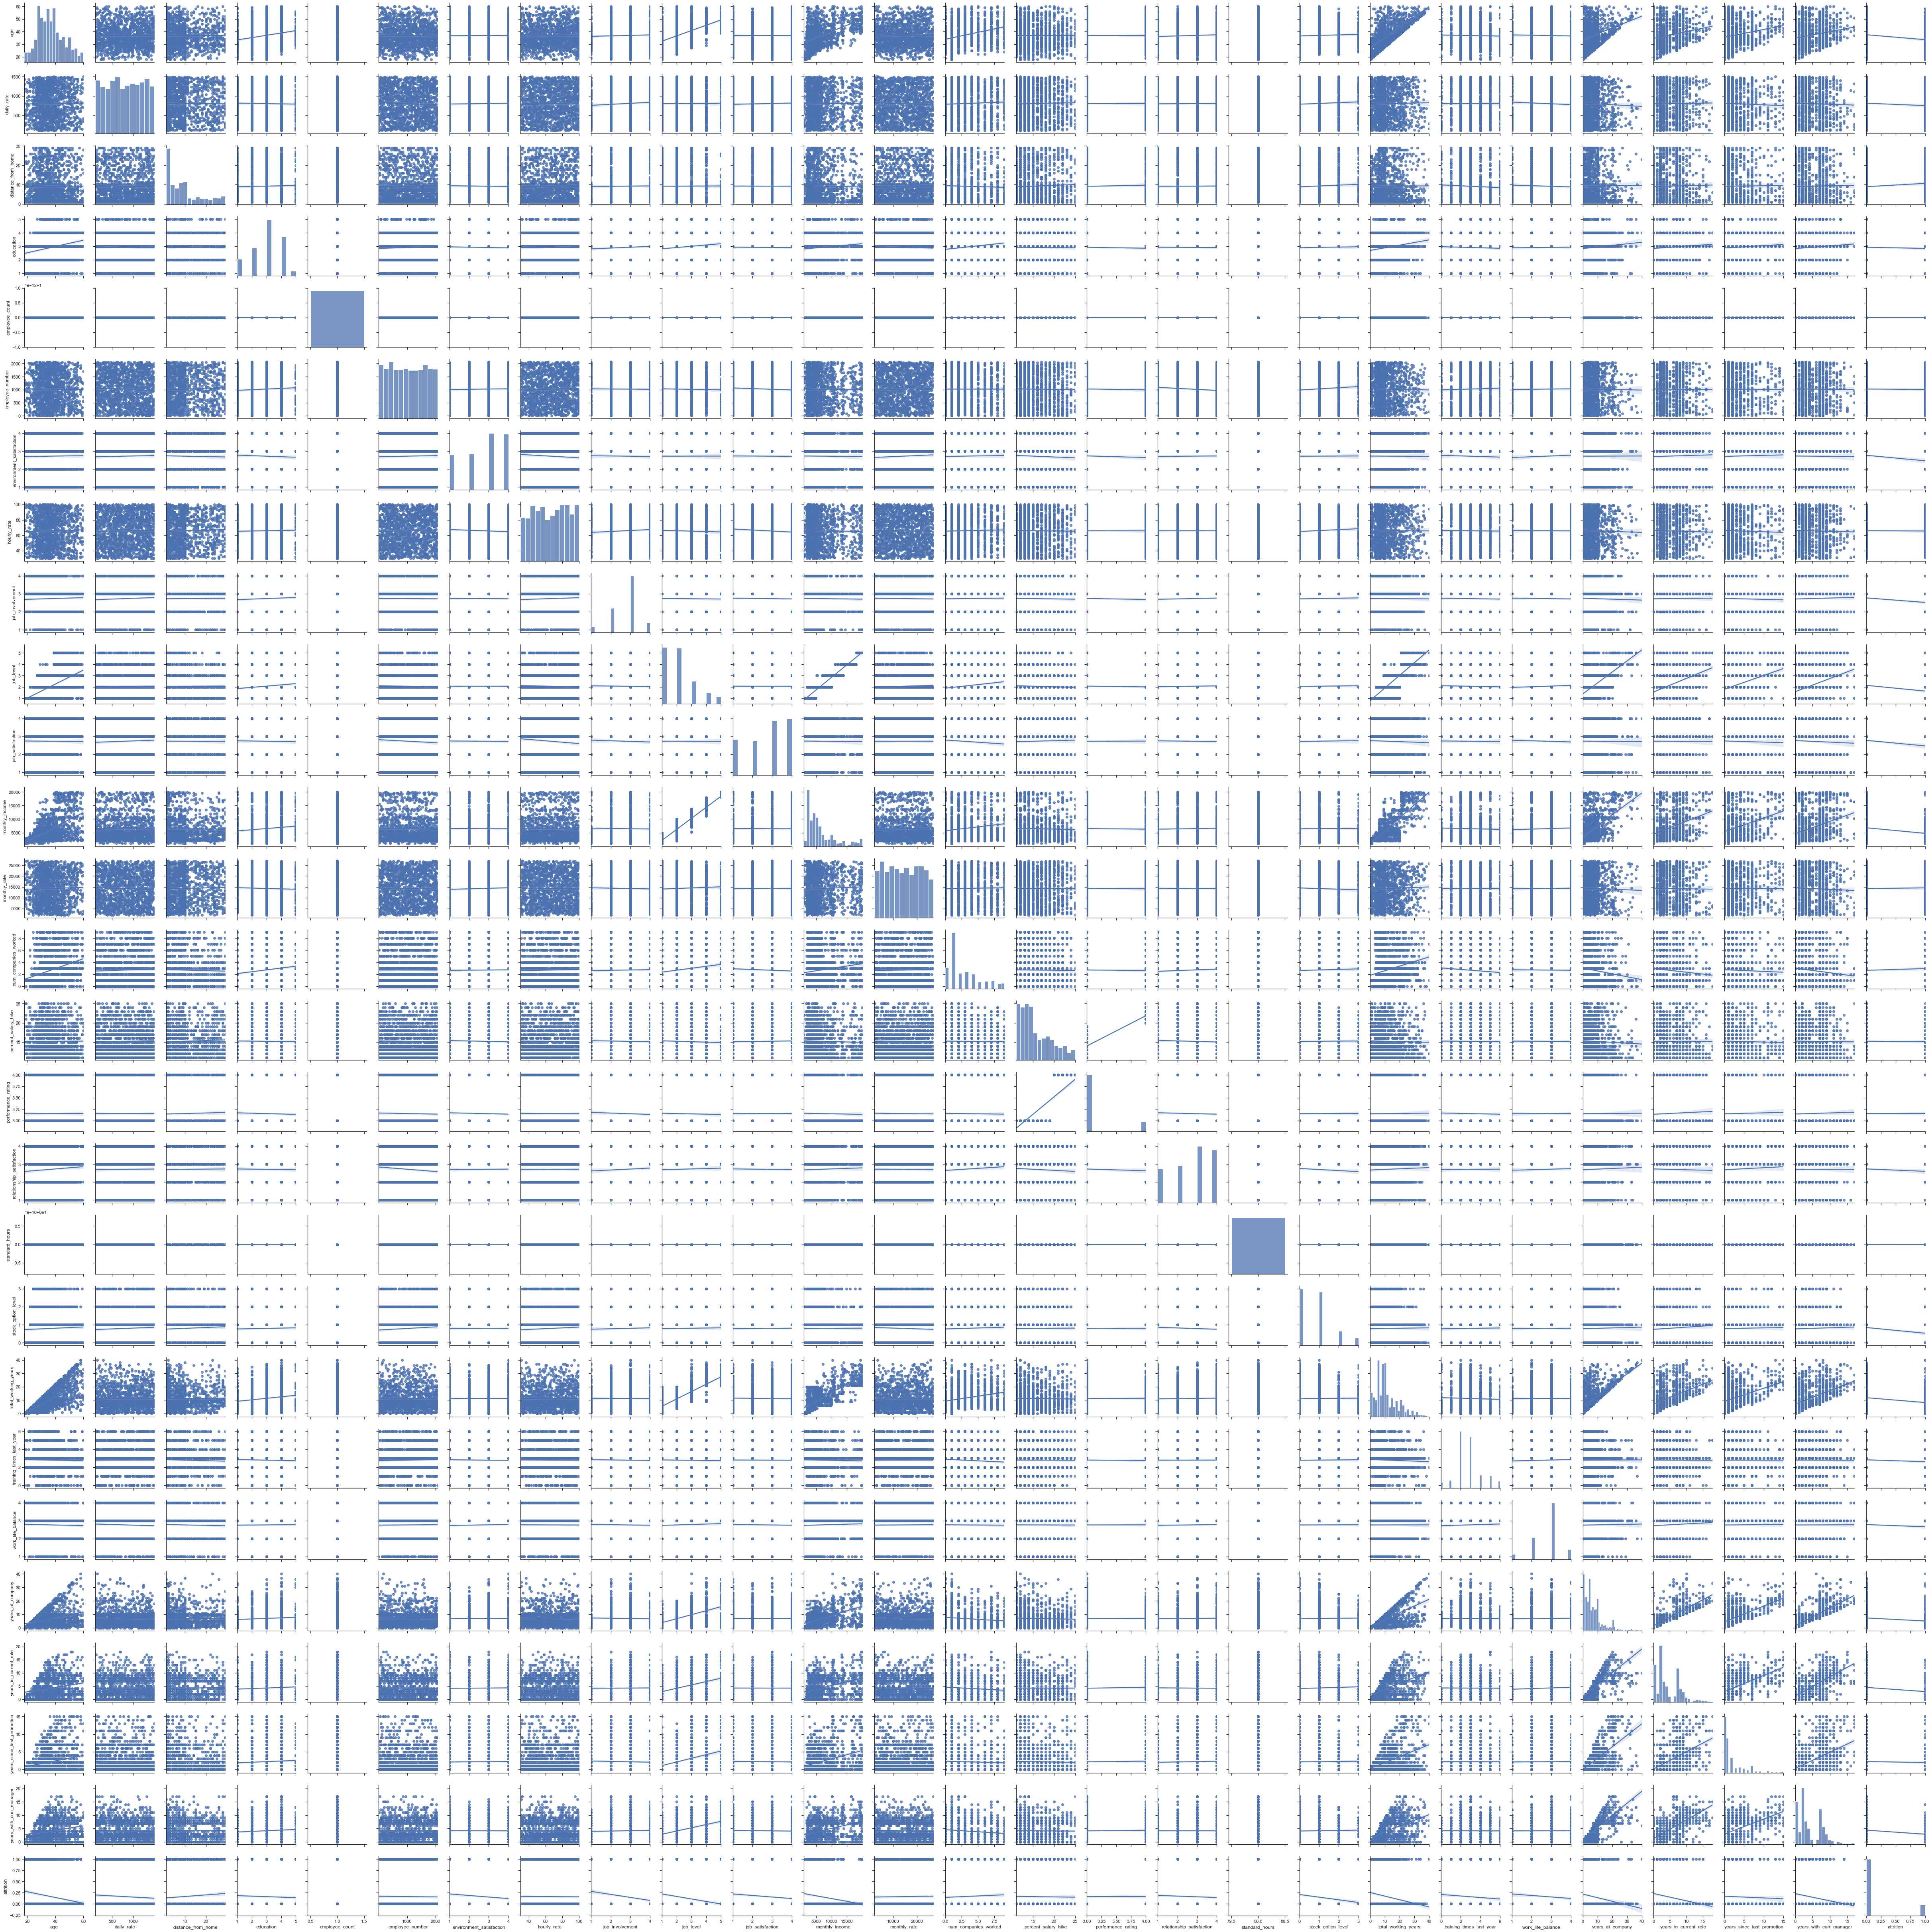

In [12]:
# 2. Using seaborn's pairplot() to plot the correlations as scatter plots and regression lines
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8)
sns.pairplot(attrition_df, kind="reg")

# Saving the graph to disk
plt.tight_layout() 
plt.savefig('correlation-pairplot.png', dpi=300)


<AxesSubplot:>

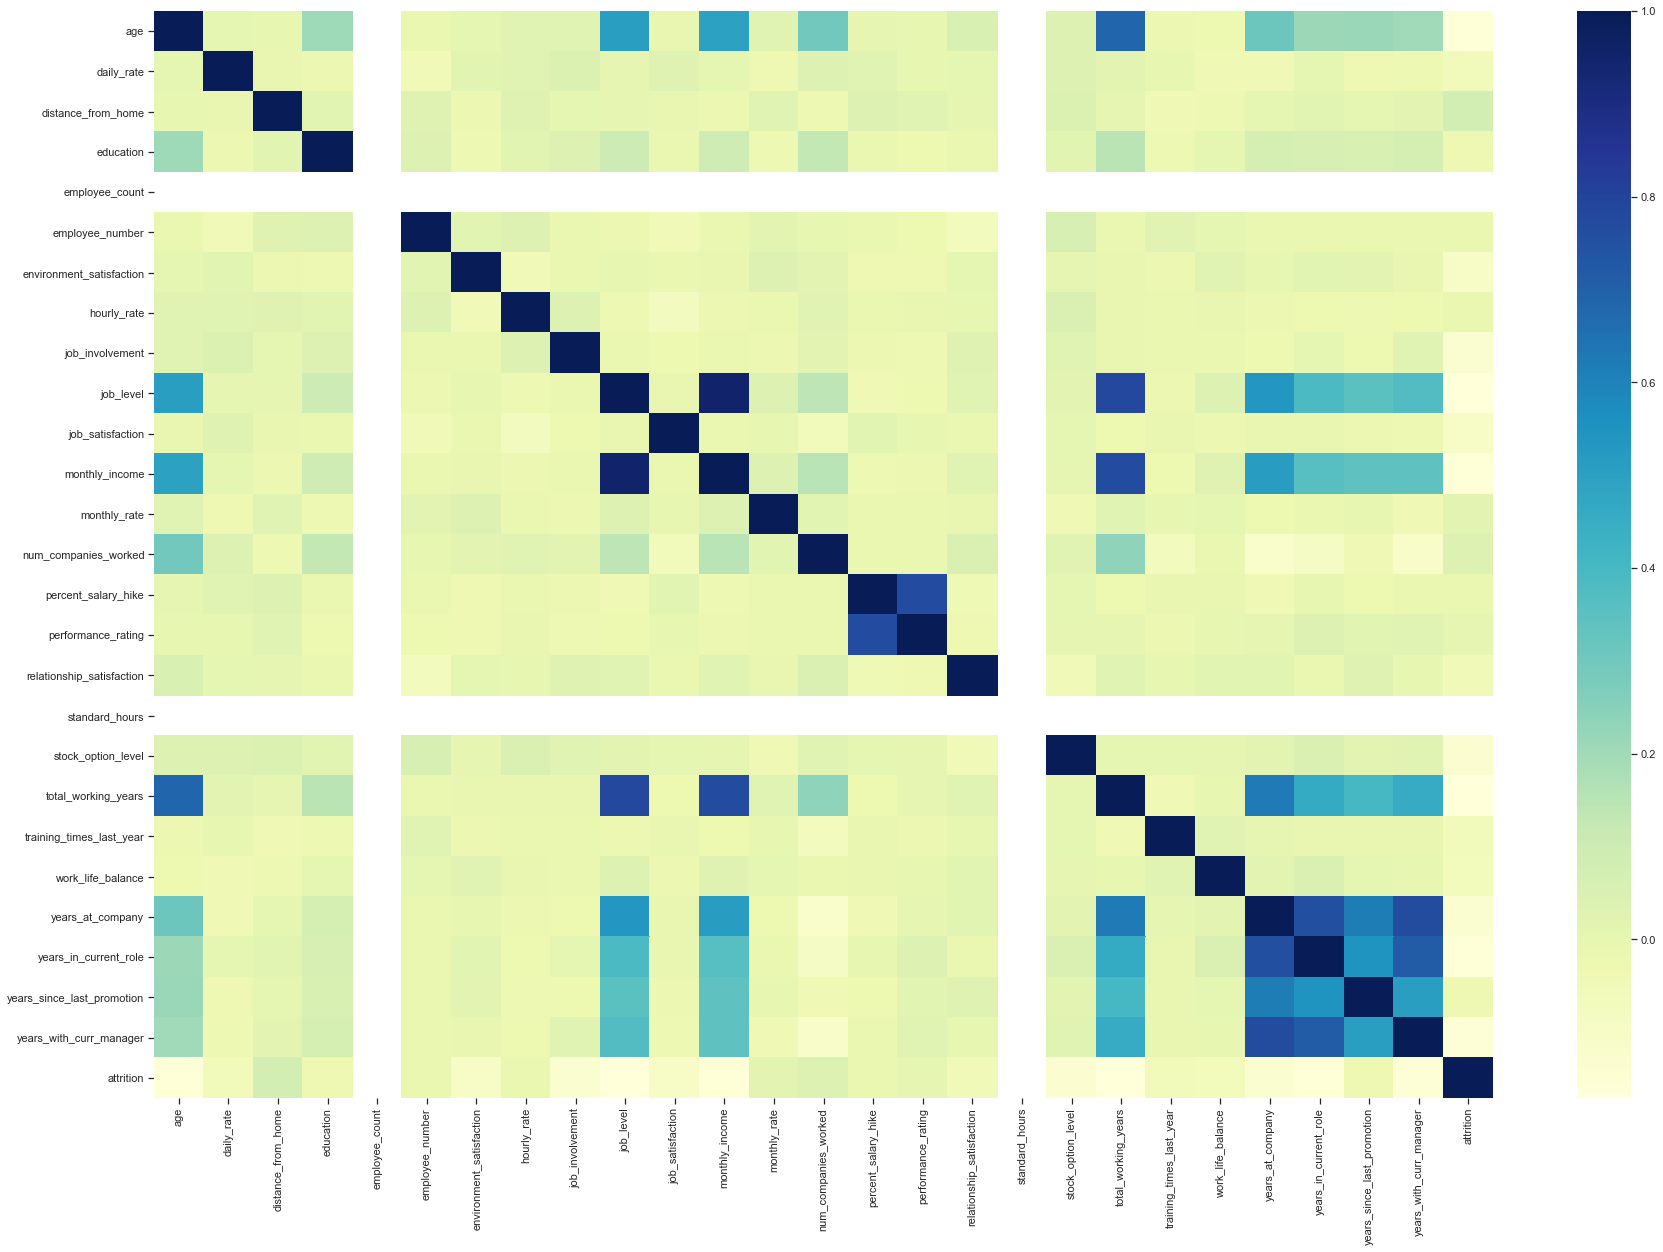

In [13]:
# 3.Using seaborn to plot the correlations as a heatmap
# Dark shades represents positive correlation while lighter shades represents negative correlation
plt.figure(figsize=(30,20))
sns.heatmap(attrition_df.corr(),cmap='YlGnBu',annot=False)

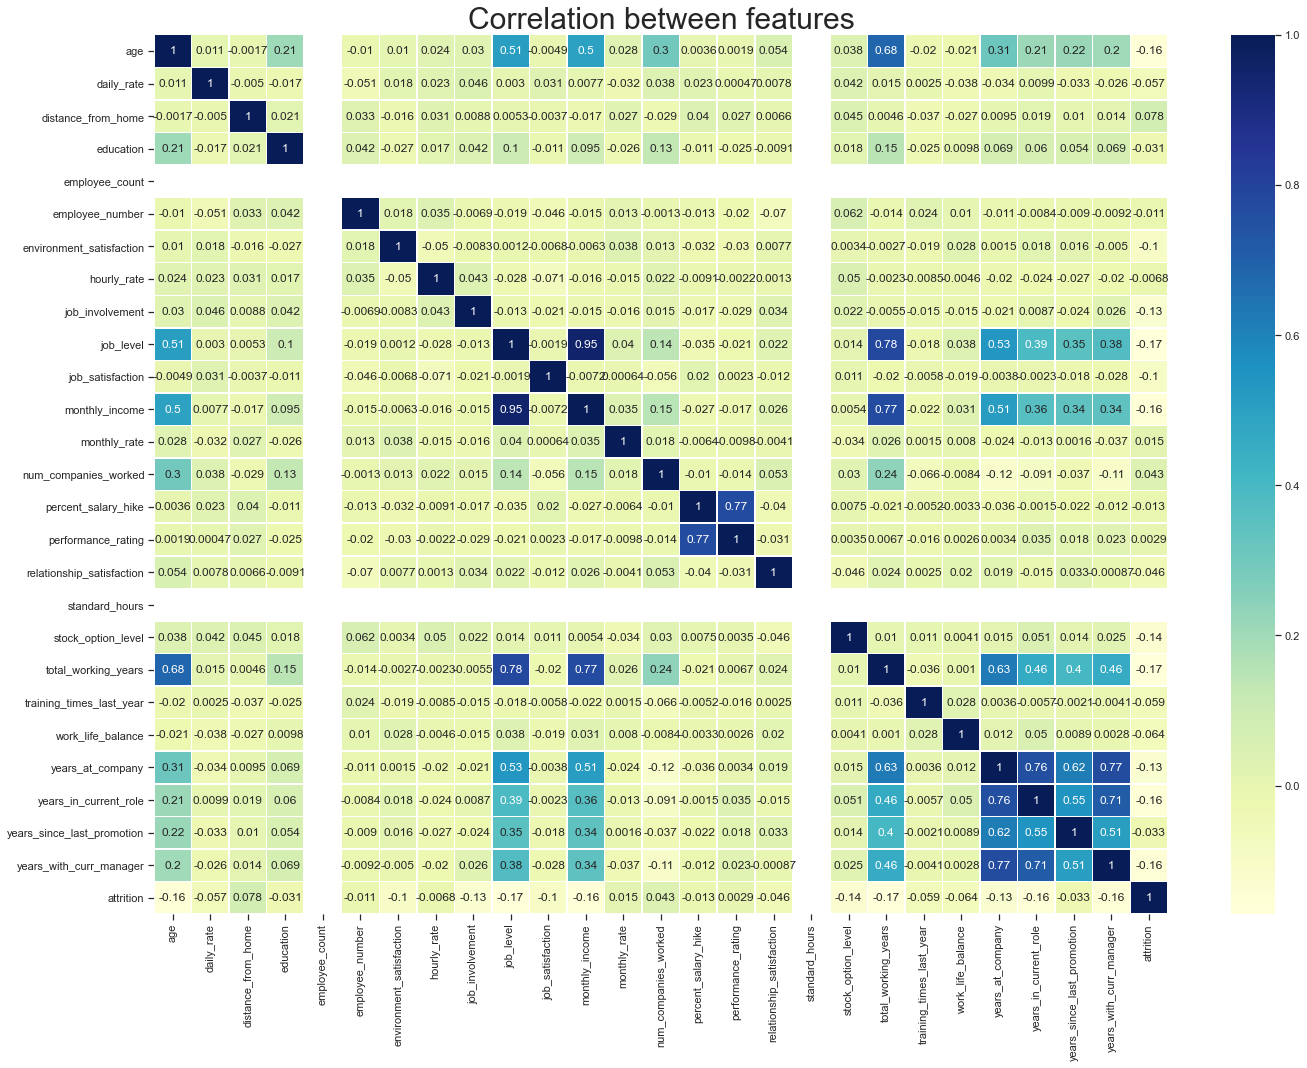

In [14]:
# 4. Using seaborn to plot the correlations as a heatmap
plt.rcParams['figure.figsize'] = (20, 15) 
#figsize(width, height) in inches - default(6.4, 4.8)
sns.heatmap(attrition_df.corr(), annot = True, linewidths=.5, cmap="YlGnBu") # YellowGreenBlue
plt.title('Correlation between features', fontsize = 30)

# Saving the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-rectangular.png', dpi=300)

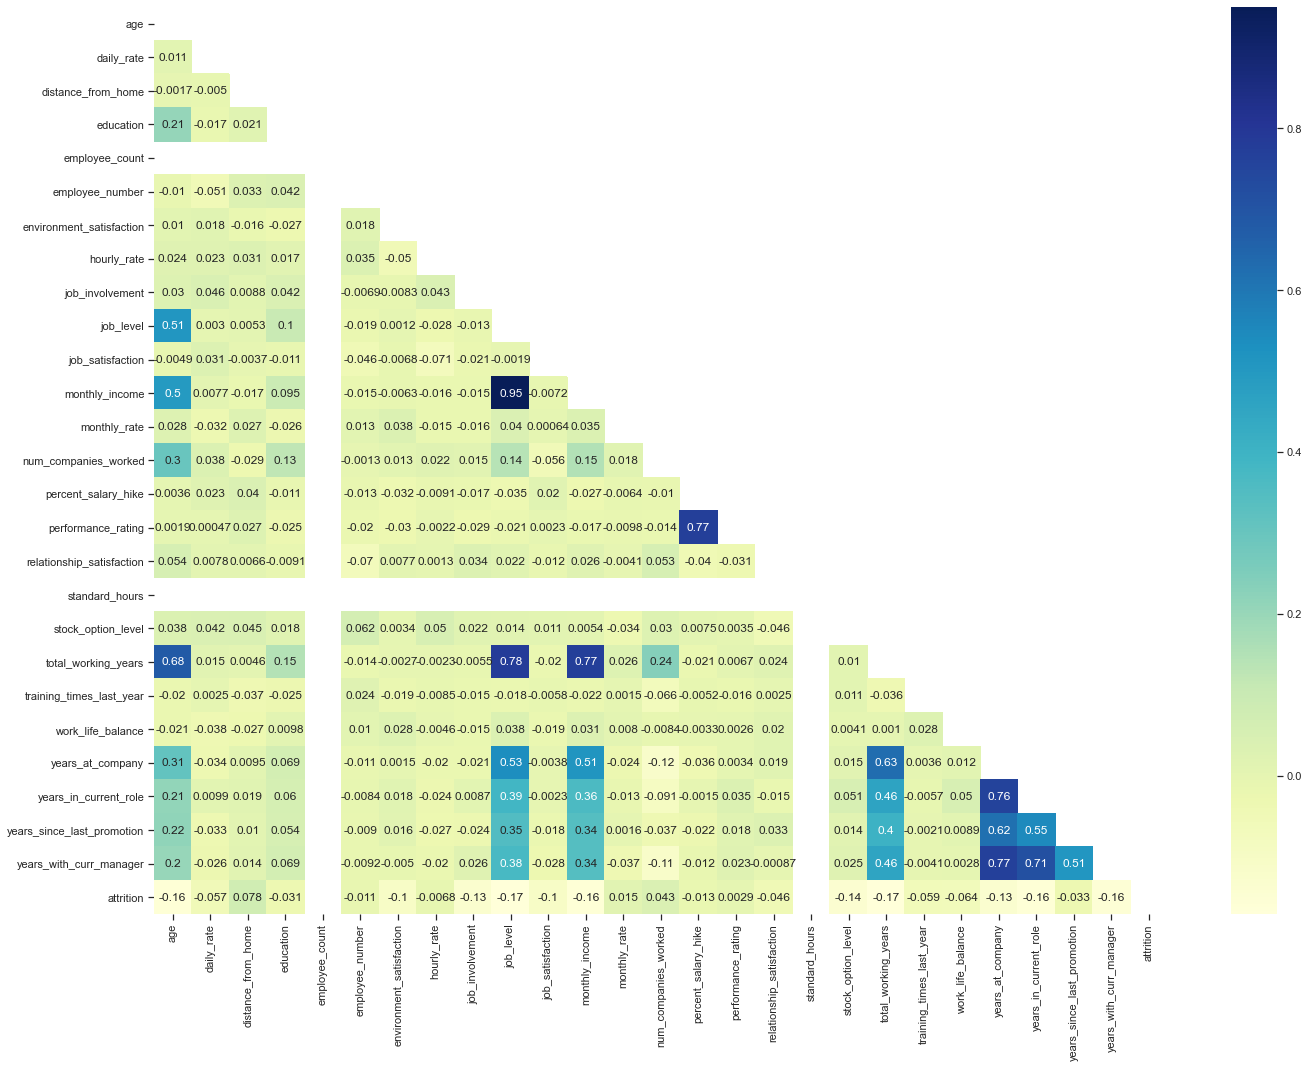

In [15]:
# Changing the shape of the matrix from rectangular to triangular
matrix = np.triu(attrition_df.corr())
sns.heatmap(attrition_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

# Saving the graph to disk
plt.tight_layout()
plt.savefig('correlation-heatmap-traingular.png', dpi=300)

# 7. Visualisations of continuous variables

## 7.1 What is the proportion of diabetics in the sample?

labels: ['Retainment', 'Attrition']
values: [1233, 237]


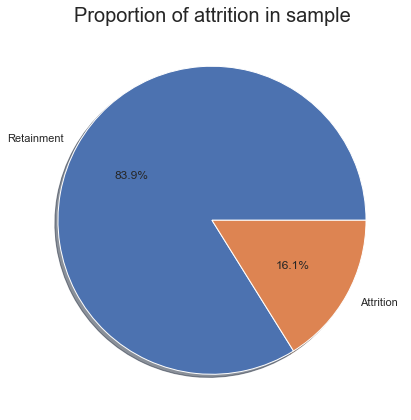

In [16]:
# Plot a pie chart
labels = ["Retainment", "Attrition"]
print(f"labels: {labels}")

# Get the values from the "attrition" column - using values to get the values
values = attrition_df["attrition"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8)
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of attrition in sample", fontsize=20)

# Saving the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('proportion-attrition.png', dpi=300)

## 7.2 Split the data into 2 groups - retained and attrited to perform further analysis (this might or might not be useful)

In [17]:
# retained
retained_df = attrition_df[attrition_df["attrition"]==0]
retained_df.head()

age    business_travel  daily_rate              department  \
1   49  Travel_Frequently         279  Research & Development   
3   33  Travel_Frequently        1392  Research & Development   
4   27      Travel_Rarely         591  Research & Development   
5   32  Travel_Frequently        1005  Research & Development   
6   59      Travel_Rarely        1324  Research & Development   

   distance_from_home  education education_field  employee_count  \
1                   8          1   Life Sciences               1   
3                   3          4   Life Sciences               1   
4                   2          1         Medical               1   
5                   2          2   Life Sciences               1   
6                   3          3         Medical               1   

   employee_number  environment_satisfaction  ... standard_hours  \
1                2                         3  ...             80   
3                5                         4  ...             80   
4                7                         1  ...             80   
5                8                         4  ...             80   
6               10                         3  ...             80   

   stock_option_level  total_working_years  training_times_last_year  \
1                   1                   10                         3   
3                   0                    8                         3   
4                   1                    6                         3   
5                   0                    8                         2   
6                   3                   12                         3   

  work_life_balance  years_at_company years_in_current_role  \
1                 3                10                     7   
3                 3                 8                     7   
4                 3                 2                     2   
5                 2                 7                     7   
6                 2                 1                     0   

   years_since_last_promotion  years_with_curr_manager  attrition  
1                           1                        7          0  
3                           3                        0          0  
4                           2                        2          0  
5                           3                        6          0  
6                           0                        0          0  

[5 rows x 35 columns]

In [18]:
# attrited
attrited_df = attrition_df[attrition_df["attrition"]==1]
attrited_df.head()

age business_travel  daily_rate              department  \
0    41   Travel_Rarely        1102                   Sales   
2    37   Travel_Rarely        1373  Research & Development   
14   28   Travel_Rarely         103  Research & Development   
21   36   Travel_Rarely        1218                   Sales   
24   34   Travel_Rarely         699  Research & Development   

    distance_from_home  education education_field  employee_count  \
0                    1          2   Life Sciences               1   
2                    2          2           Other               1   
14                  24          3   Life Sciences               1   
21                   9          4   Life Sciences               1   
24                   6          1         Medical               1   

    employee_number  environment_satisfaction  ... standard_hours  \
0                 1                         2  ...             80   
2                 4                         4  ...             80   
14               19                         3  ...             80   
21               27                         3  ...             80   
24               31                         2  ...             80   

    stock_option_level  total_working_years  training_times_last_year  \
0                    0                    8                         0   
2                    0                    7                         3   
14                   0                    6                         4   
21                   0                   10                         4   
24                   0                    8                         2   

   work_life_balance  years_at_company years_in_current_role  \
0                  1                 6                     4   
2                  3                 0                     0   
14                 3                 4                     2   
21                 3                 5                     3   
24                 3                 4                     2   

    years_since_last_promotion  years_with_curr_manager  attrition  
0                            0                        5          1  
2                            0                        0          1  
14                           0                        3          1  
21                           0                        3          1  
24                           1                        3          1  

[5 rows x 35 columns]

# 7.3 Impact of age on attrition

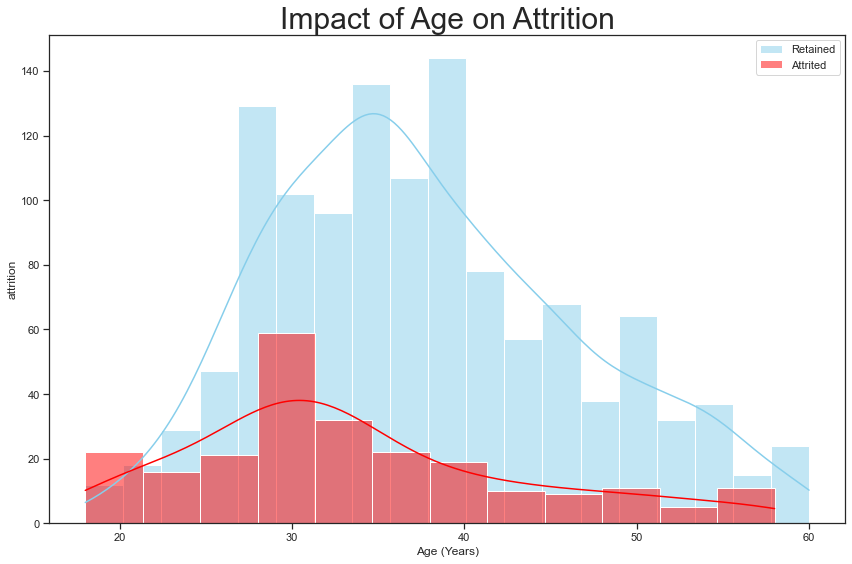

In [19]:
# Plot frequency distributions of non-diabetics and diabetics
# Ref:https://seaborn.pydata.org/generated/seaborn.distplot.html

plt.figure(figsize=(12,8))

sns.histplot(data=retained_df, x="age", color="skyblue", label="Retained", kde=True)
sns.histplot(data=attrited_df, x="age", color="red", label="Attrited", kde=True)

plt.legend()
plt.title('Impact of Age on Attrition', fontsize = 30)
plt.xlabel("Age (Years)")
plt.ylabel("attrition")

# Saving the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age-attrition.png', dpi=300) # dpi=300 is print quality

# 7.4 Impact of job level on attrition

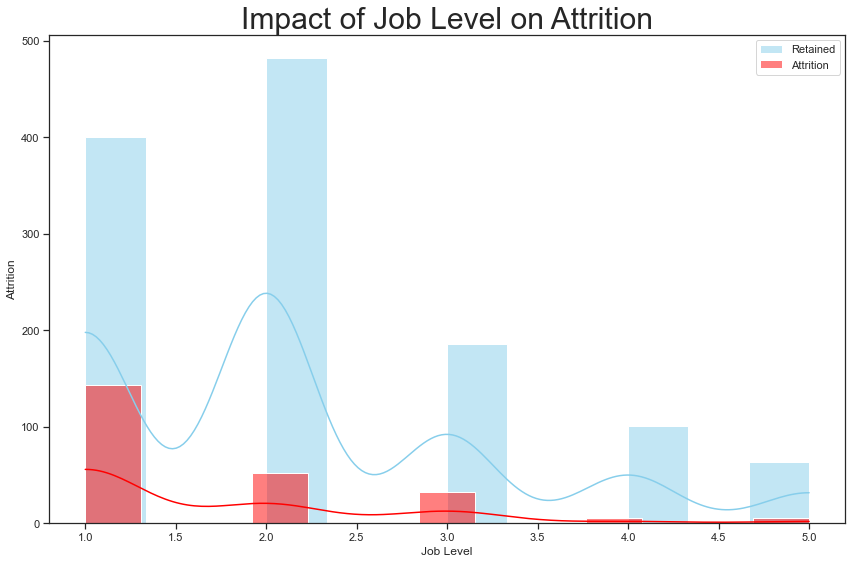

In [20]:
# Plot frequency distributions of retained_df and attrited_df
plt.figure(figsize=(12,8))


sns.histplot(data=retained_df, x="job_level", color="skyblue", label="Retained", kde=True)
sns.histplot(data=attrited_df, x="job_level", color="red", label="Attrition", kde=True)

plt.title('Impact of Job Level on Attrition', fontsize = 30)
plt.xlabel("Job Level")
plt.ylabel("Attrition")
plt.legend()

# Saving the graph to disk
plt.tight_layout() 
plt.savefig('joblevel-attrition.png', dpi=300) 

## 7.5 Impact of environment_satisfaction on attrition

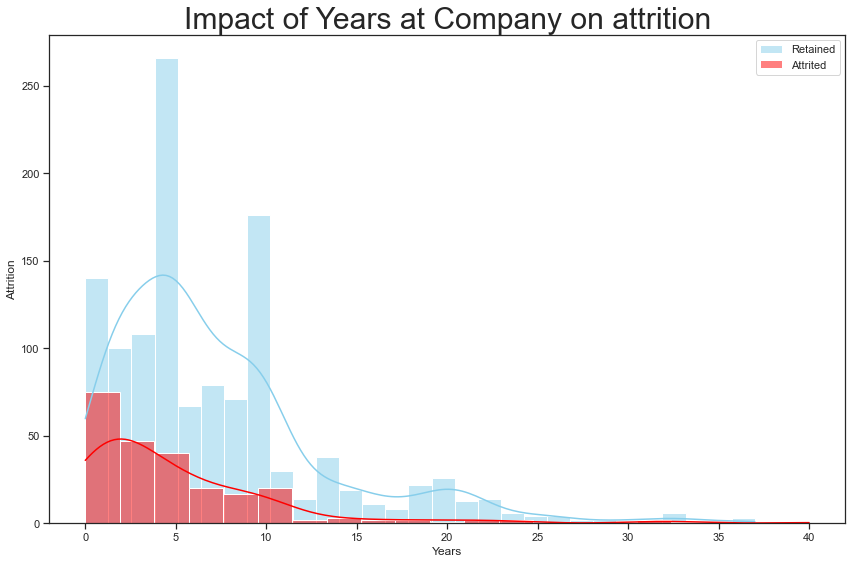

In [21]:
# Plot frequency distributions of retained_df and attrited_df
plt.figure(figsize=(12,8))

sns.histplot(data=retained_df, x="years_at_company", color="skyblue", label="Retained", kde=True)
sns.histplot(data=attrited_df, x="years_at_company", color="red", label="Attrited", kde=True)

plt.legend()
plt.title('Impact of Years at Company on attrition', fontsize = 30)
plt.xlabel("Years")
plt.ylabel("Attrition")

# Saving the graph to disk
plt.tight_layout()
plt.savefig('yac_attrition.png', dpi=300) 

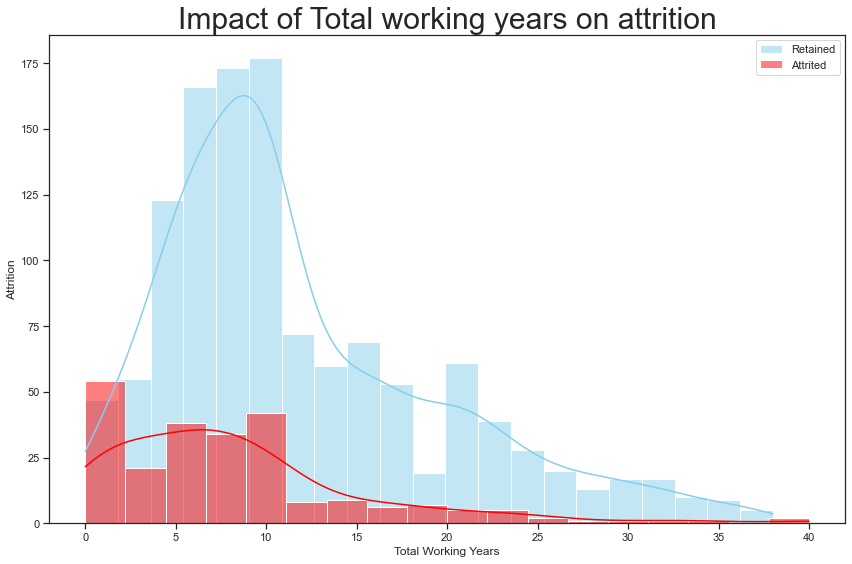

In [22]:
# Plot frequency distributions of retained_df and attrited_df

plt.figure(figsize=(12,8))

sns.histplot(data=retained_df, x="total_working_years", color="skyblue", label="Retained", kde=True)
sns.histplot(data=attrited_df, x="total_working_years", color="red", label="Attrited", kde=True)

plt.legend()
plt.title('Impact of Total working years on attrition', fontsize = 30)
plt.xlabel("Total Working Years")
plt.ylabel("Attrition")
# Saving the graph to disk
plt.tight_layout()
plt.savefig('twy_attrition.png', dpi=300) 

# 8. Visualisations of categorical variables

There is no categorical variable in this dataset. We'll create an arbitrary categorical variable for the purpose of illustrating the plotting of categorical charts.

## 8.1 Compute new categorical data and insert as a new column

In [23]:
def income(df): 
    if df["monthly_income"] <= 3500:
        return "0"
    elif df["monthly_income"] > 3500:
        return "1"

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function monthly_income()
# To which it passes the attrition_df as parameter
# And a category is returned and saved in a new column named "monthly_income_category"
attrition_df["monthly_income_category"] = \
    attrition_df.apply(lambda attrition_df:income(attrition_df), axis = 1) # axis=1 = row-wise
# Check
attrition_df.head()
# This works as there's a new column named "monthly_income_category"
# The column "monthly_income" is no longer needed and hence can be deleted 

# This example has shown how to add a column using apply() and a lambda function

age    business_travel  daily_rate              department  \
0   41      Travel_Rarely        1102                   Sales   
1   49  Travel_Frequently         279  Research & Development   
2   37      Travel_Rarely        1373  Research & Development   
3   33  Travel_Frequently        1392  Research & Development   
4   27      Travel_Rarely         591  Research & Development   

   distance_from_home  education education_field  employee_count  \
0                   1          2   Life Sciences               1   
1                   8          1   Life Sciences               1   
2                   2          2           Other               1   
3                   3          4   Life Sciences               1   
4                   2          1         Medical               1   

   employee_number  environment_satisfaction  ... stock_option_level  \
0                1                         2  ...                  0   
1                2                         3  ...                  1   
2                4                         4  ...                  0   
3                5                         4  ...                  0   
4                7                         1  ...                  1   

   total_working_years  training_times_last_year  work_life_balance  \
0                    8                         0                  1   
1                   10                         3                  3   
2                    7                         3                  3   
3                    8                         3                  3   
4                    6                         3                  3   

  years_at_company  years_in_current_role years_since_last_promotion  \
0                6                      4                          0   
1               10                      7                          1   
2                0                      0                          0   
3                8                      7                          3   
4                2                      2                          2   

   years_with_curr_manager  attrition  monthly_income_category  
0                        5          1                        1  
1                        7          0                        1  
2                        0          1                        0  
3                        0          0                        0  
4                        2          0                        0  

[5 rows x 36 columns]

In [24]:
# Separate the clean data into retained and attrited
retained_df = attrition_df[attrition_df["attrition"]==0]
attrited_df = attrition_df[attrition_df["attrition"]==1] 

## 8.2 Plotting 2 categories as 2 separate plots side-by-side

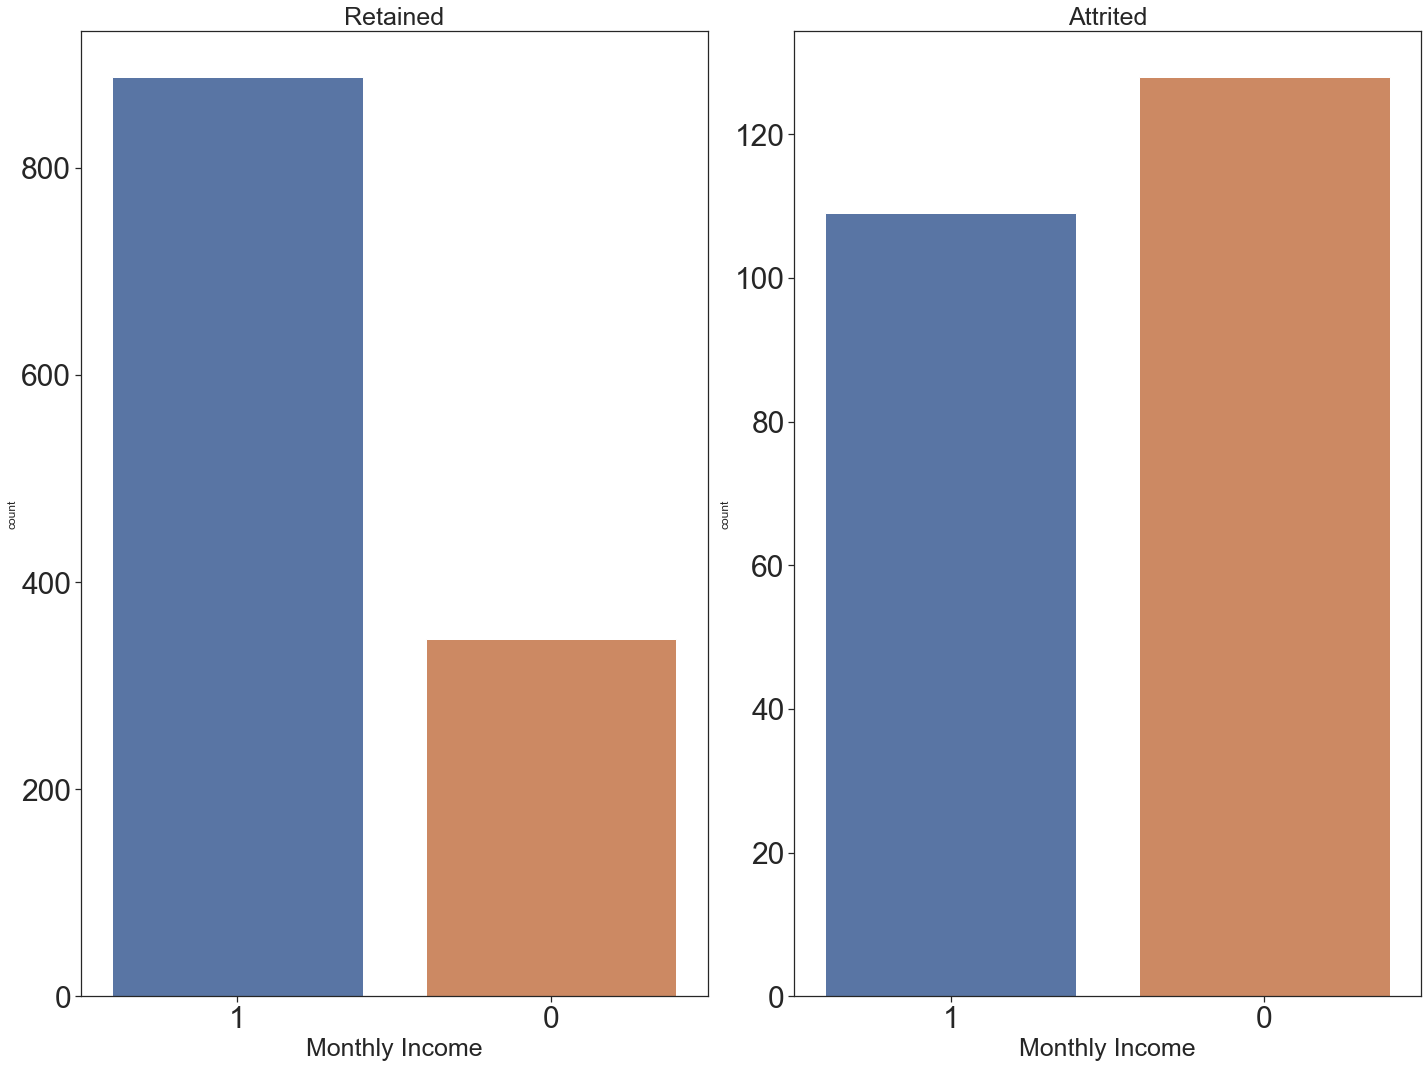

In [25]:
# Plot the charts using Seaborn's countplot()

# AS 2 separate plots side by side
fig, ax = plt.subplots(1,2)
ax1 = sns.countplot(x="monthly_income_category", data=retained_df, ax=ax[0]) # Retained dataset
ax2 = sns.countplot(x="monthly_income_category", data=attrited_df, ax=ax[1]) # Attrited dataset

ax1.set_title("Retained", fontsize=25)
ax1.set_xlabel("Monthly Income", fontsize=25)
ax2.set_title("Attrited", fontsize=25)
ax2.set_xlabel("Monthly Income", fontsize=25)
ax1.tick_params(axis='both', which='both', labelsize=30) # x/y axes, minor/major ticks for ax1
ax2.tick_params(axis='both', which='both', labelsize=30) # x/y axes, minor/major ticks for ax2


# Saving the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('monthly_income_category-side-by-side.png', dpi=300) # dpi=300 is print quality

## 8.3 Plotting 2 categories as a single plot

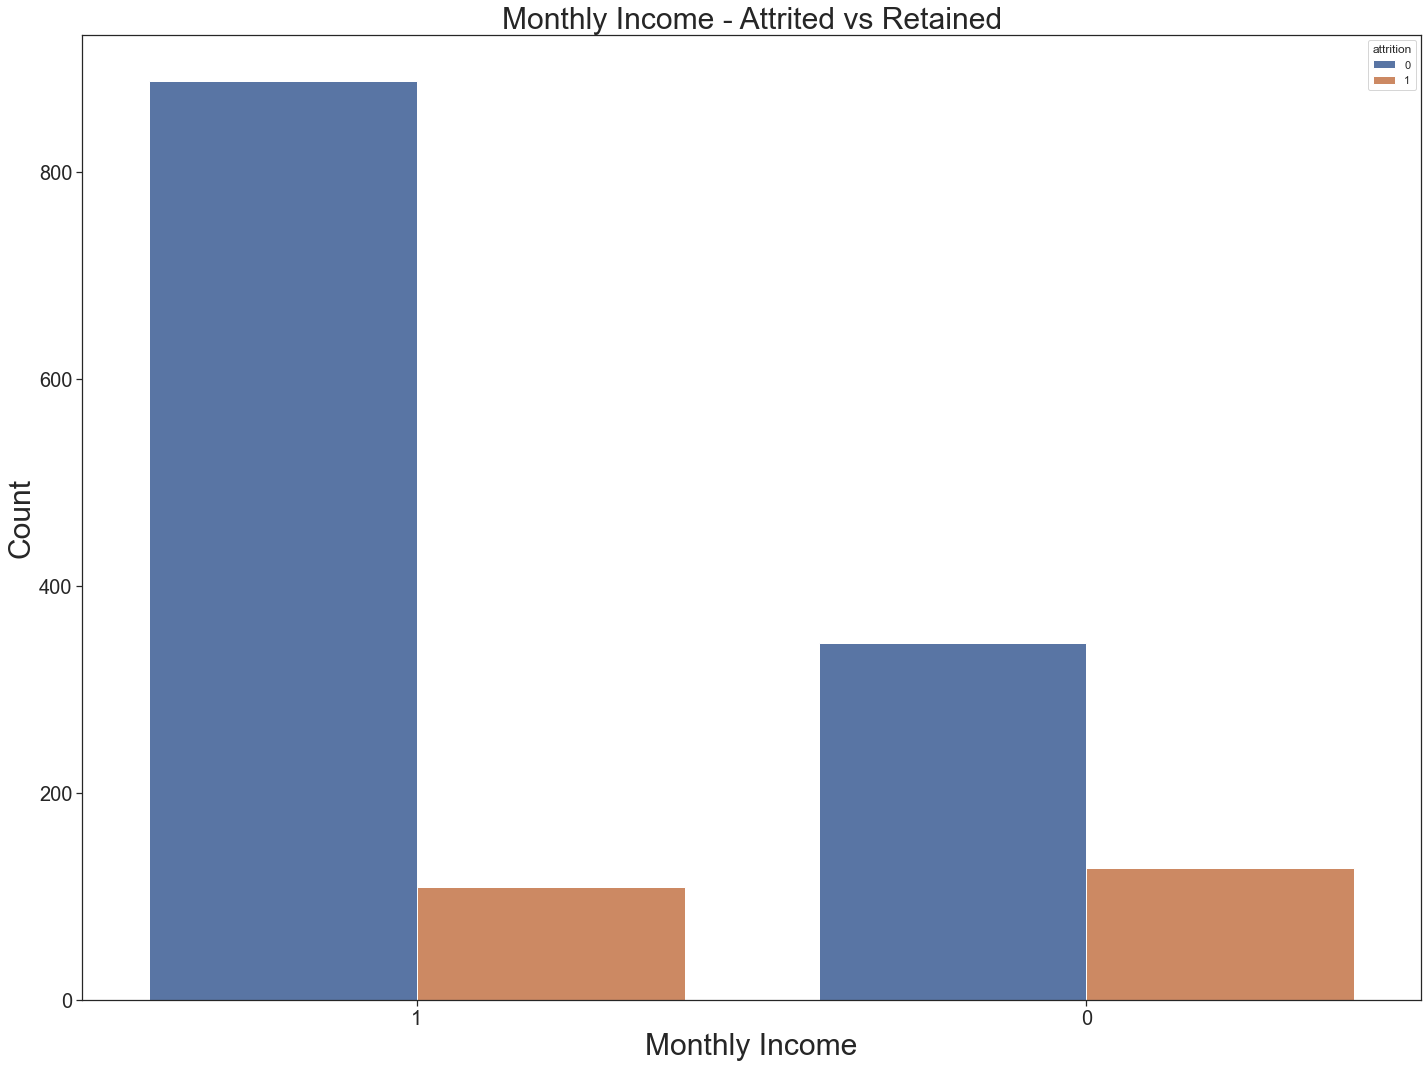

In [26]:
# Plot the charts using Seaborn's countplot()

# As a single plot with wo count charts
sns.countplot(x='monthly_income_category', 
              data=attrition_df, # Whole dataset (retained + attrited)
              hue='attrition') # grouped by outcome

plt.title('Monthly Income - Attrited vs Retained', fontsize=30)
plt.xlabel("Monthly Income", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# Saving the graph to disk
plt.tight_layout()
plt.savefig('monthly-income_category-single.png', dpi=300) 

# 9. Univariate data visualisation

## 9.1 An example of univariate data visualisation

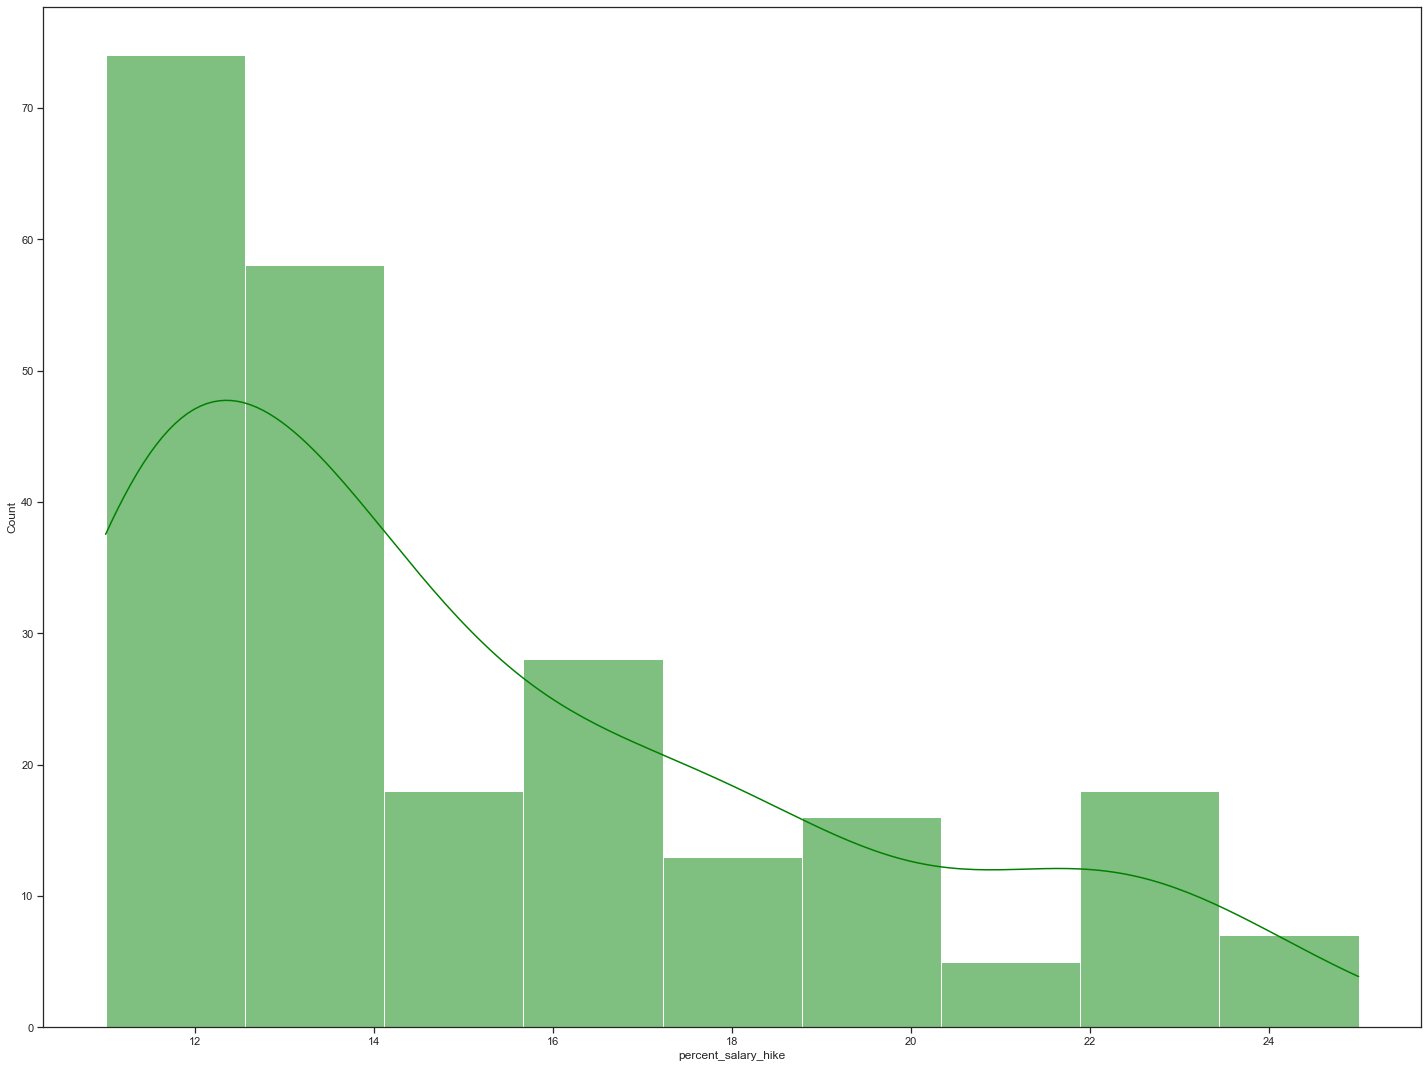

In [27]:
# Plotting the distribution of a continuous variable (percent_salary_hike) as a histogram.

sns.histplot(data=attrited_df, x="percent_salary_hike", color="green", kde=True)

# Saving the graph to disk
plt.tight_layout()
plt.savefig('salary_hike-histogram.png', dpi=300) 

# 10. Bivariate data visualisation

## 10.1 An example of  bivariate data visualisation

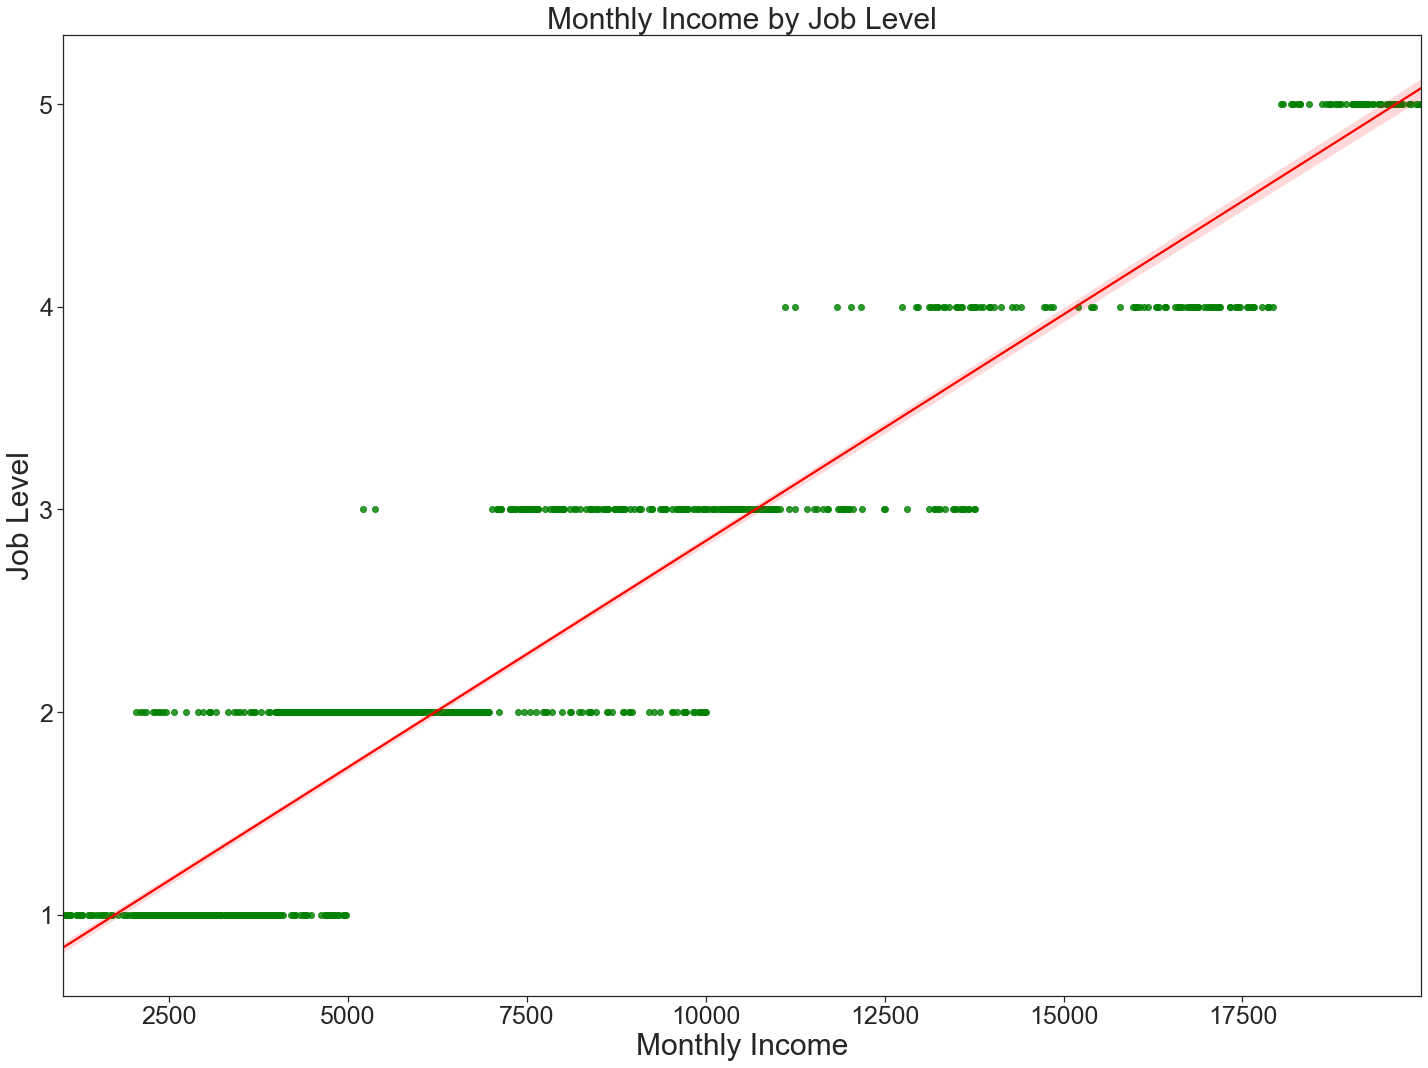

In [28]:
# Regression plot
sns.regplot(x="monthly_income", y="job_level", data=attrition_df, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('Monthly Income by Job Level', fontsize = 30)
plt.xlabel("Monthly Income", fontsize=30)
plt.ylabel("Job Level", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=25)

# Saving the graph to disk
plt.tight_layout()
plt.savefig('scatterplot-mi-level.png', dpi=300)